In [1]:
#%% Bài 1
import math
def S_n(n,i=1):
    if i==n:
        return  math.sqrt(n)
    else:
        return  round(math.sqrt(i+S_n(n,i+1)),2)

n = int(input('Nhập liệu số N: '))
print('Kết quả S_n= : {0}'.format(S_n(n)))

Kết quả S_n= : 1.76


In [2]:
#%% Bài 2:

hangdonvi = {0: ['zero', ''], 1: ['one', 'one'], 2: ['two', 'twen'], 3: ['three', 'third'], 4: ['four', 'four'],5: ['five', 'fif'], 6: ['six', 'six'], 7: ['seven', 'seven'], 8: ['eight', 'eigh'], 9: ['nine', 'nine']}
sodacbiet = {10: 'ten', 11: 'eleven', 12: 'twelve'}
hangchuc = ['teen', 'ty', 'ty-']

def tachso(n):
    return n // 10, n % 10

def thaydoi(n):
    f_n, s_n = tachso(n)
    if f_n == 0:
        return hangdonvi.get(s_n)[0]
    else:
        if n <= 12:
            return sodacbiet.get(n)
        elif n < 20:
            return hangdonvi.get(s_n)[1]+ '-' + hangchuc[0]
        elif n % 10 == 0:
            return hangdonvi.get(f_n)[1]+ '-' + hangchuc[1]
        else:
            return hangdonvi.get(f_n)[1] + hangchuc[2] + hangdonvi.get(s_n)[0]

n = int(input('n = '))
print(f'Kết quả {n} : {thaydoi(n)}')

Kết quả 4 : four


**BÀI 3**

In [3]:
# Thư viện
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
# Nhập dữ liệu
df = pd.read_csv(r'https://raw.githubusercontent.com/BrianNguyen2001/Basic-Python/main/Test/Test%202/Car_Prices.csv')
df.head()

,Manufacturer,Mileage,Age(yrs),Sell Price($)
0,Audi,69000,6,18000
1,Audi,35000,3,34000
2,BMW,57000,5,26100
3,Audi,22500,2,40000
4,BMW,46000,4,31500


In [5]:
# Câu 1
sale = df['Sell Price($)']
age = df['Age(yrs)']
mileage = df['Mileage']
sale,age,mileage = np.array(sale),np.array(age),np.array(mileage)
age= sm.add_constant(age)
mileage= sm.add_constant(mileage)

In [6]:
# Mô hình đơn biến 1
model_1a = sm.OLS(sale,age)
# Kết quả đơn biến 1
result_1a = model_1a.fit()
print(result_1a.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     140.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           6.14e-10
Time:                        11:26:31   Log-Likelihood:                -185.44
No. Observations:                  20   AIC:                             374.9
Df Residuals:                      18   BIC:                             376.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.648e+04   1894.705     24.530      0.0

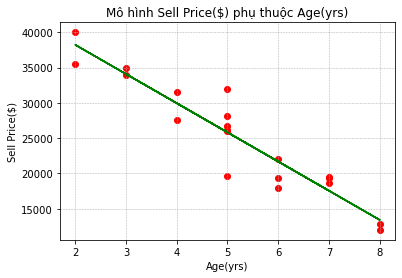

In [7]:
# Mô hình Sell Price($) phụ thuộc Age(yrs)
plt.scatter(df['Age(yrs)'], df['Sell Price($)'],c='red', cmap='viridis')
plt.plot(df['Age(yrs)'],result_1a.params[0] + result_1a.params[1] * df['Age(yrs)'],'g')
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.title('Mô hình Sell Price($) phụ thuộc Age(yrs)')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [8]:
# Mô hình đơn biến 2
model_1b = sm.OLS(sale,mileage)
# Kết quả đơn biến 2
result_1b = model_1b.fit()
print(result_1b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     260.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           3.73e-12
Time:                        11:26:31   Log-Likelihood:                -179.79
No. Observations:                  20   AIC:                             363.6
Df Residuals:                      18   BIC:                             365.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.718e+04   1435.851     32.855      0.0

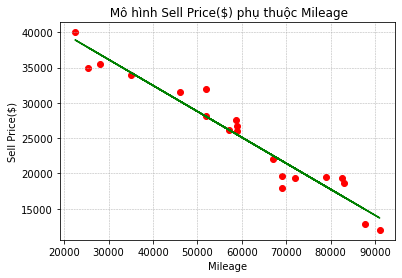

In [9]:
# Mô hình Sell Price($) phụ thuộc Mileage
plt.scatter(df['Mileage'], df['Sell Price($)'],c='red', cmap='viridis')
plt.plot(df['Mileage'],result_1b.params[0] + result_1b.params[1] * df['Mileage'],'g')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title(' Mô hình Sell Price($) phụ thuộc Mileage')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [10]:
# Mô hình hồi quy đa biến
y = df['Sell Price($)']
x = df[['Age(yrs)','Mileage']]

x,y = np.array(x), np.array(y)
x = sm.add_constant(x)

model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     124.0
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           7.29e-11
Time:                        11:26:32   Log-Likelihood:                -179.73
No. Observations:                  20   AIC:                             365.5
Df Residuals:                      17   BIC:                             368.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.722e+04   1480.191     31.904      0.0

In [11]:
# Dự đoán
new_x = np.array([[7,65000],[3,42000]])
length = new_x.__len__()
new_x= sm.add_constant(new_x)
new_y = result.predict(new_x)
pre = pd.DataFrame(new_y,index=[i for i in range(1,length+1)], columns=['Predict value'])
print(pre)

   Predict value
1   22764.182833
2   31956.294117
